In [1]:
!pip install google-api-python-client
!pip install googleapiclient.discovery
!pip install IPython
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from config.config import YOUTUBE_API_KEY
from googleapiclient.discovery import build
from IPython.display import JSON

ERROR: Could not find a version that satisfies the requirement googleapiclient.discovery (from versions: none)
ERROR: No matching distribution found for googleapiclient.discovery


In [2]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(
    api_service_name, api_version, developerKey=YOUTUBE_API_KEY)


In [3]:
channel_ids = [
    'UCtatfZMf-8EkIwASXM4ts0A',
    'UC8butISFwT-Wl7EV0hUK0BQ',
    'UC7cs8q-gJRlGwj4A8OmCmXg',
    'UCtYLUTtgS3k1Fg4y5tAhLbw',
    'UCKQdc0-Targ4nDIAUrlfKiA',
    
]

In [4]:
request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=",".join(channel_ids)
)
response = request.execute()

print(response)

{'kind': 'youtube#channelListResponse', 'etag': 'ZVuAU0QbMazGIthtvK0QN7ZqVik', 'pageInfo': {'totalResults': 5, 'resultsPerPage': 5}, 'items': [{'kind': 'youtube#channel', 'etag': '5_A_lAzzXu4XhAU64lzkP5Gxa10', 'id': 'UCtatfZMf-8EkIwASXM4ts0A', 'snippet': {'title': 'AssemblyAI', 'description': "Welcome to the AssemblyAI YouTube channel, where we cover the latest innovations in AI and how to build AI-powered features fast.\n\nAt AssemblyAI, we are leveraging the latest AI research to continuously improve accuracy and offer production-ready AI models — all with a developer-friendly API.\n\nWe love to share what we know best. So on this channel, we bring you the latest developments in AI, tutorials, and educational videos on Machine Learning and Deep Learning. Every week, we'll be with you with fresh content.\n\nYou can follow us on other social media too! \n\n- Follow us on Twitter: https://twitter.com/AssemblyAI\n- Join our Discord: https://discord.gg/aSMMpMadFh\n\nTo see AssemblyAI in a

In [5]:
JSON(response)

<IPython.core.display.JSON object>

In [6]:
channel_data = []
for item in response.get("items", []):
    channel_info = {
        "title": item["snippet"].get("title"),
        "description": item["snippet"].get("description"),
        "customUrl": item["snippet"].get("customUrl"),
        "country": item["snippet"].get("country"),
        "viewCount": item["statistics"].get("viewCount"),
        "subscriberCount": item["statistics"].get("subscriberCount"),
        "videoCount": item["statistics"].get("videoCount"),
        "publishedAt": item["snippet"].get("publishedAt"),
    }
    channel_data.append(channel_info)

for channel in channel_data:
    print(channel)

{'title': 'AssemblyAI', 'description': "Welcome to the AssemblyAI YouTube channel, where we cover the latest innovations in AI and how to build AI-powered features fast.\n\nAt AssemblyAI, we are leveraging the latest AI research to continuously improve accuracy and offer production-ready AI models — all with a developer-friendly API.\n\nWe love to share what we know best. So on this channel, we bring you the latest developments in AI, tutorials, and educational videos on Machine Learning and Deep Learning. Every week, we'll be with you with fresh content.\n\nYou can follow us on other social media too! \n\n- Follow us on Twitter: https://twitter.com/AssemblyAI\n- Join our Discord: https://discord.gg/aSMMpMadFh\n\nTo see AssemblyAI in action, try our playground: https://www.assemblyai.com/playground/?utm_source=youtube&utm_medium=referral&utm_campaign=about\n\nTo see all the models we offer and start using them with a free API token visit our website: https://www.assemblyai.com/?utm_sou

In [7]:
df = pd.DataFrame(channel_data)
df


,title,description,customUrl,country,viewCount,subscriberCount,videoCount,publishedAt
0,AssemblyAI,"Welcome to the AssemblyAI YouTube channel, whe...",@assemblyai,US,14645925,168000,363,2020-08-31T18:36:35.725854Z
1,Alex The Analyst,My name is Alex Freberg and on this channel I ...,@alextheanalyst,US,50568939,1070000,364,2020-01-08T05:04:24.970712Z
2,Python Simplified,Hi everyone! My name is Mariya and I'm a softw...,@pythonsimplified,CA,11563418,257000,199,2019-01-25T00:48:09Z
3,StatQuest with Josh Starmer,"Statistics, Machine Learning, Data Science, an...",@statquest,US,80066463,1430000,291,2011-05-24T01:52:48Z
4,freeCodeCamp.org,"Learn math, programming, and computer science ...",@freecodecamp,US,870358476,10800000,1866,2014-12-16T21:18:48Z


In [8]:
df.isnull().sum()

title              0
description        0
customUrl          0
country            0
viewCount          0
subscriberCount    0
videoCount         0
publishedAt        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            5 non-null      object
 1   description      5 non-null      object
 2   customUrl        5 non-null      object
 3   country          5 non-null      object
 4   viewCount        5 non-null      object
 5   subscriberCount  5 non-null      object
 6   videoCount       5 non-null      object
 7   publishedAt      5 non-null      object
dtypes: object(8)
memory usage: 452.0+ bytes


In [10]:
df['viewCount'] = df['viewCount'].astype(int)
df['subscriberCount'] = df['subscriberCount'].astype(int)
df['videoCount'] = df['videoCount'].astype(int)

In [11]:
df['publishedAt']

0    2020-08-31T18:36:35.725854Z
1    2020-01-08T05:04:24.970712Z
2           2019-01-25T00:48:09Z
3           2011-05-24T01:52:48Z
4           2014-12-16T21:18:48Z
Name: publishedAt, dtype: object

In [12]:
df['publishedAt'] = df['publishedAt'].str.slice(0, 10)

In [13]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])
df['publishedAt']

0   2020-08-31
1   2020-01-08
2   2019-01-25
3   2011-05-24
4   2014-12-16
Name: publishedAt, dtype: datetime64[ns]

([], [])

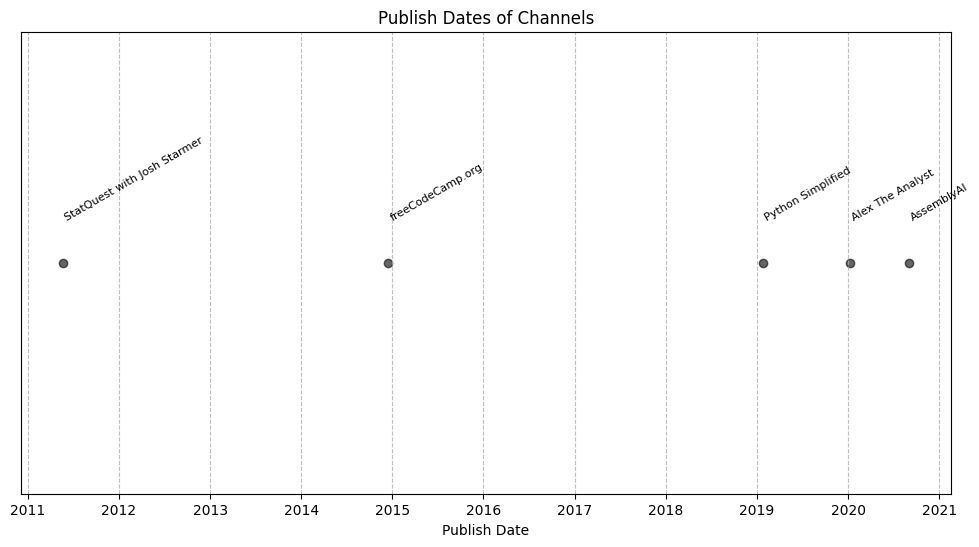

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(df['publishedAt'], [1]*len(df), alpha=0.6, color='black')

for i, row in df.iterrows():
    plt.text(row['publishedAt'], 1.01, str(row['title']), rotation=30, fontsize=8, ha='left')


plt.title('Publish Dates of Channels')
plt.xlabel('Publish Date')
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.yticks([])

In [15]:
df_sorted_subscribers = df.sort_values(by='subscriberCount', ascending=False)
df_sorted_subscribers[['title', 'subscriberCount']]

,title,subscriberCount
4,freeCodeCamp.org,10800000
3,StatQuest with Josh Starmer,1430000
1,Alex The Analyst,1070000
2,Python Simplified,257000
0,AssemblyAI,168000


Text(0.5, 0, 'Channel Name')

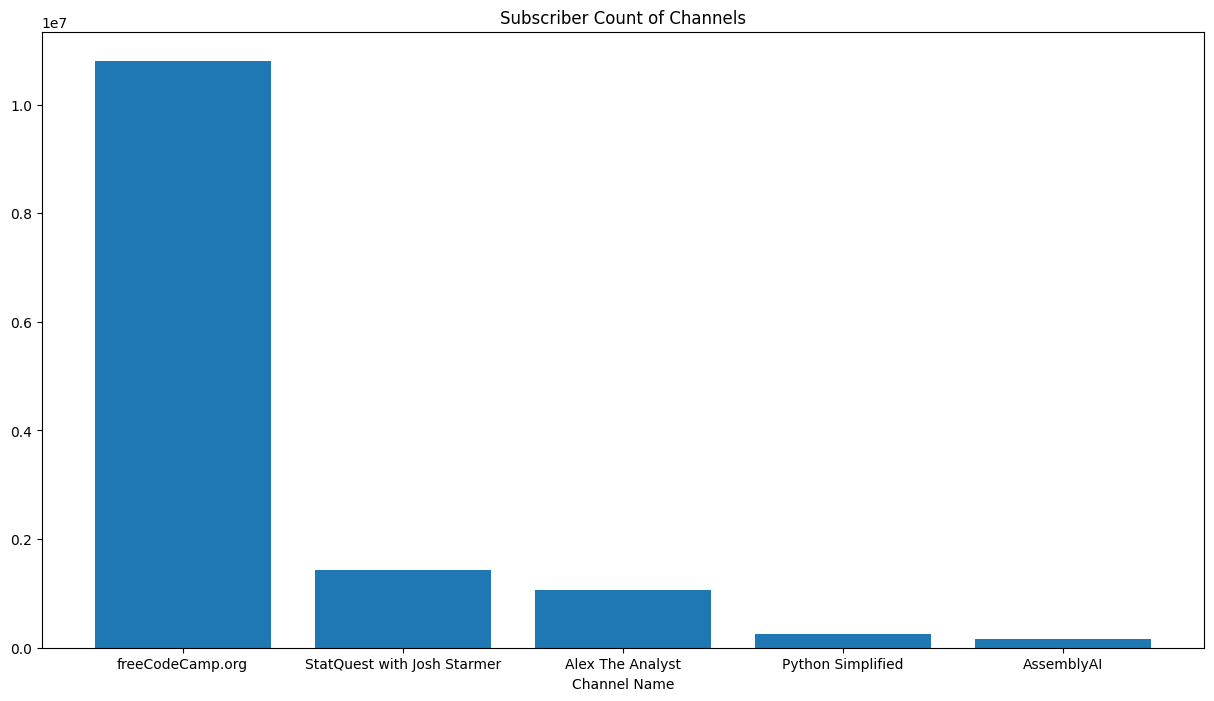

In [19]:
plt.figure(figsize=[15,8])
plt.bar(df_sorted_subscribers['title'], df_sorted_subscribers['subscriberCount'], data=df_sorted_subscribers)
plt.title("Subscriber Count of Channels")
plt.xlabel("Channel Name")

In [20]:
df_sorted_views = df.sort_values(by='viewCount', ascending=False)
df_sorted_views[['title', 'viewCount']]

,title,viewCount
4,freeCodeCamp.org,870358476
3,StatQuest with Josh Starmer,80066463
1,Alex The Analyst,50568939
0,AssemblyAI,14645925
2,Python Simplified,11563418


Text(0.5, 0, 'Channel Name')

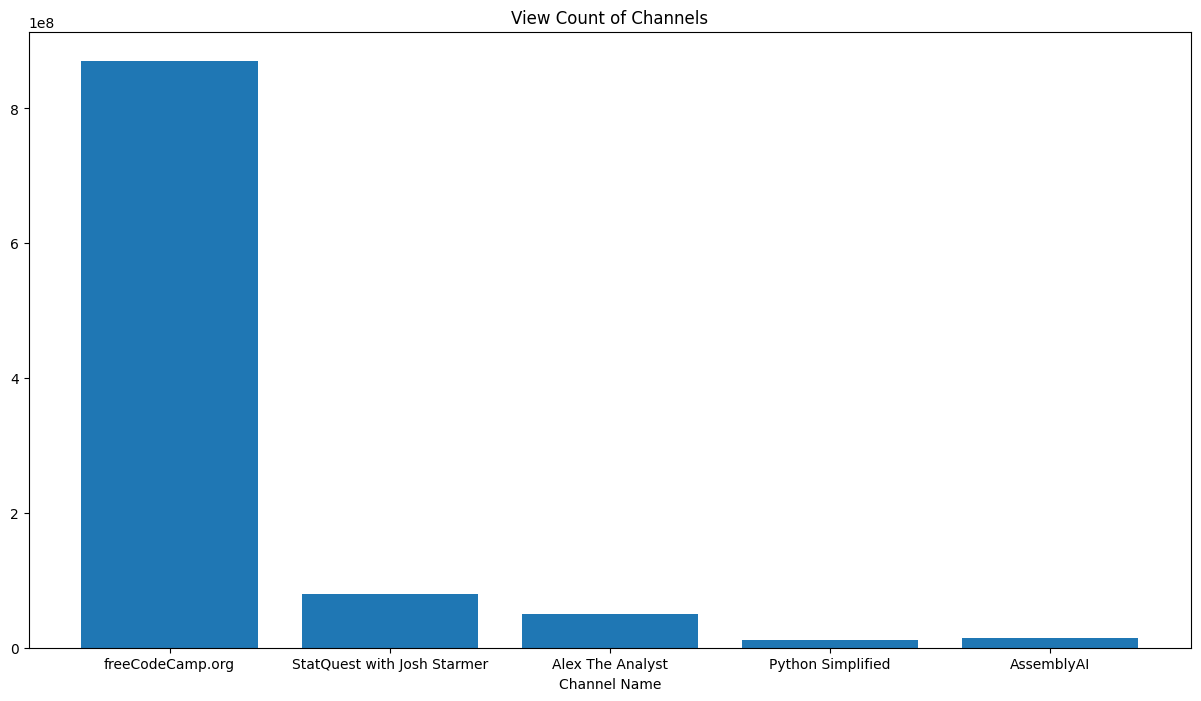

In [21]:


plt.figure(figsize=[15,8])
plt.bar(df_sorted_subscribers['title'], df_sorted_subscribers['viewCount'], data=df_sorted_views)
plt.title("View Count of Channels")
plt.xlabel("Channel Name")

In [22]:
df_sorted_videos = df.sort_values(by='videoCount', ascending=False)
df_sorted_videos[['title', 'videoCount']].head()

,title,videoCount
4,freeCodeCamp.org,1866
1,Alex The Analyst,364
0,AssemblyAI,363
3,StatQuest with Josh Starmer,291
2,Python Simplified,199


Text(0.5, 0, 'Channel Name')

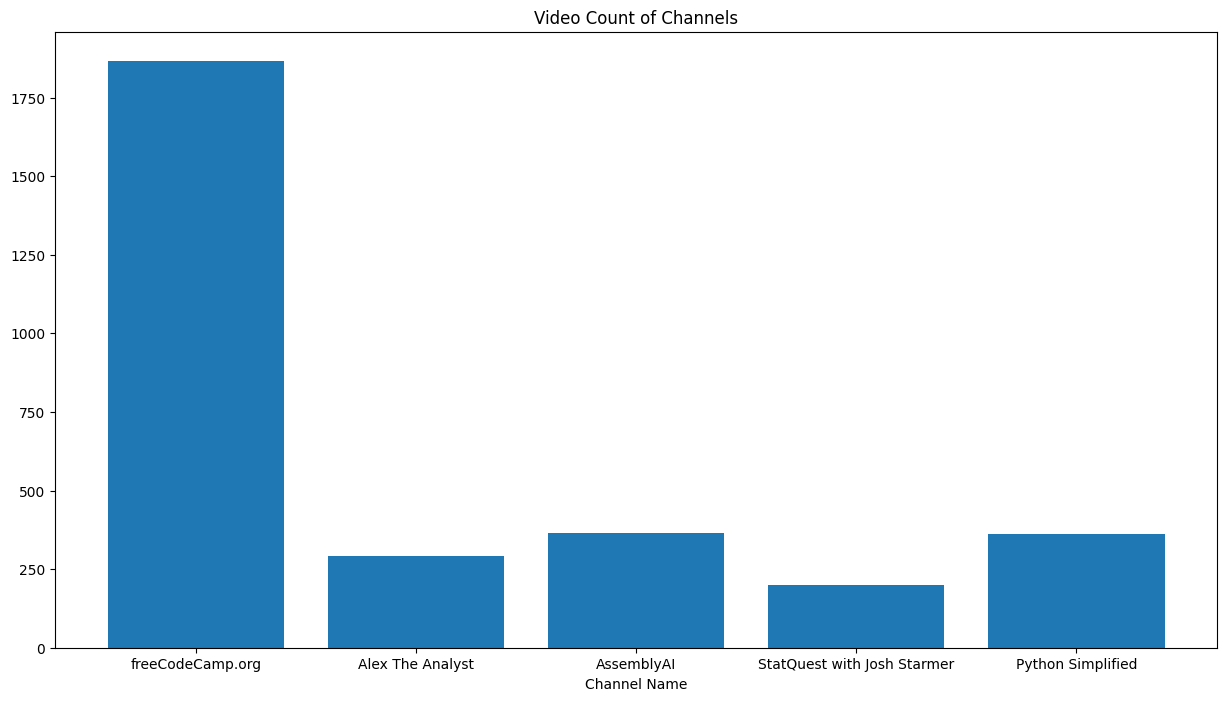

In [23]:
plt.figure(figsize=[15,8])
plt.bar(df_sorted_videos['title'], df_sorted_subscribers['videoCount'], data=df_sorted_videos)
plt.title("Video Count of Channels")
plt.xlabel("Channel Name")

In [24]:
df_country_distribution = pd.DataFrame(df['country'].value_counts())
df_country_distribution

,count
country,
US,4
CA,1


([<matplotlib.patches.Wedge at 0x274dabe9e10>,
 [Text(-0.8899187180267095, 0.6465637441936395, 'US'),
  Text(0.8899187482945414, -0.6465637025335375, 'CA')],
 [Text(-0.48541020983275057, 0.3526711331965306, '80.0%'),
  Text(0.4854102263424771, -0.3526711104728386, '20.0%')])

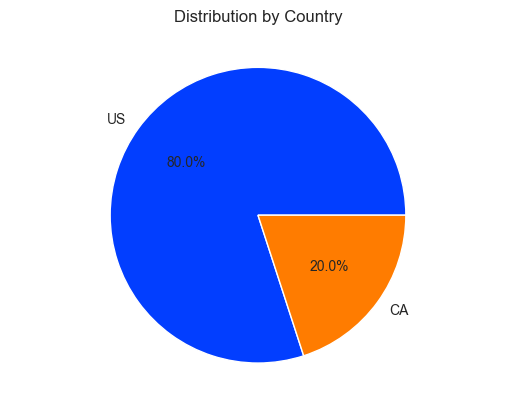

In [34]:
sns.set_style("whitegrid")
plt.title('Distribution by Country')
plt.axis('equal')
colors = sns.color_palette('bright')
plt.pie(df_country_distribution['count'], labels=df_country_distribution.index, autopct='%1.1f%%', colors=colors)

In [26]:
df.corr(numeric_only=True)

,viewCount,subscriberCount,videoCount
viewCount,1.000000,0.998959,0.994044
subscriberCount,0.998959,1.000000,0.990581
videoCount,0.994044,0.990581,1.000000


<Axes: >

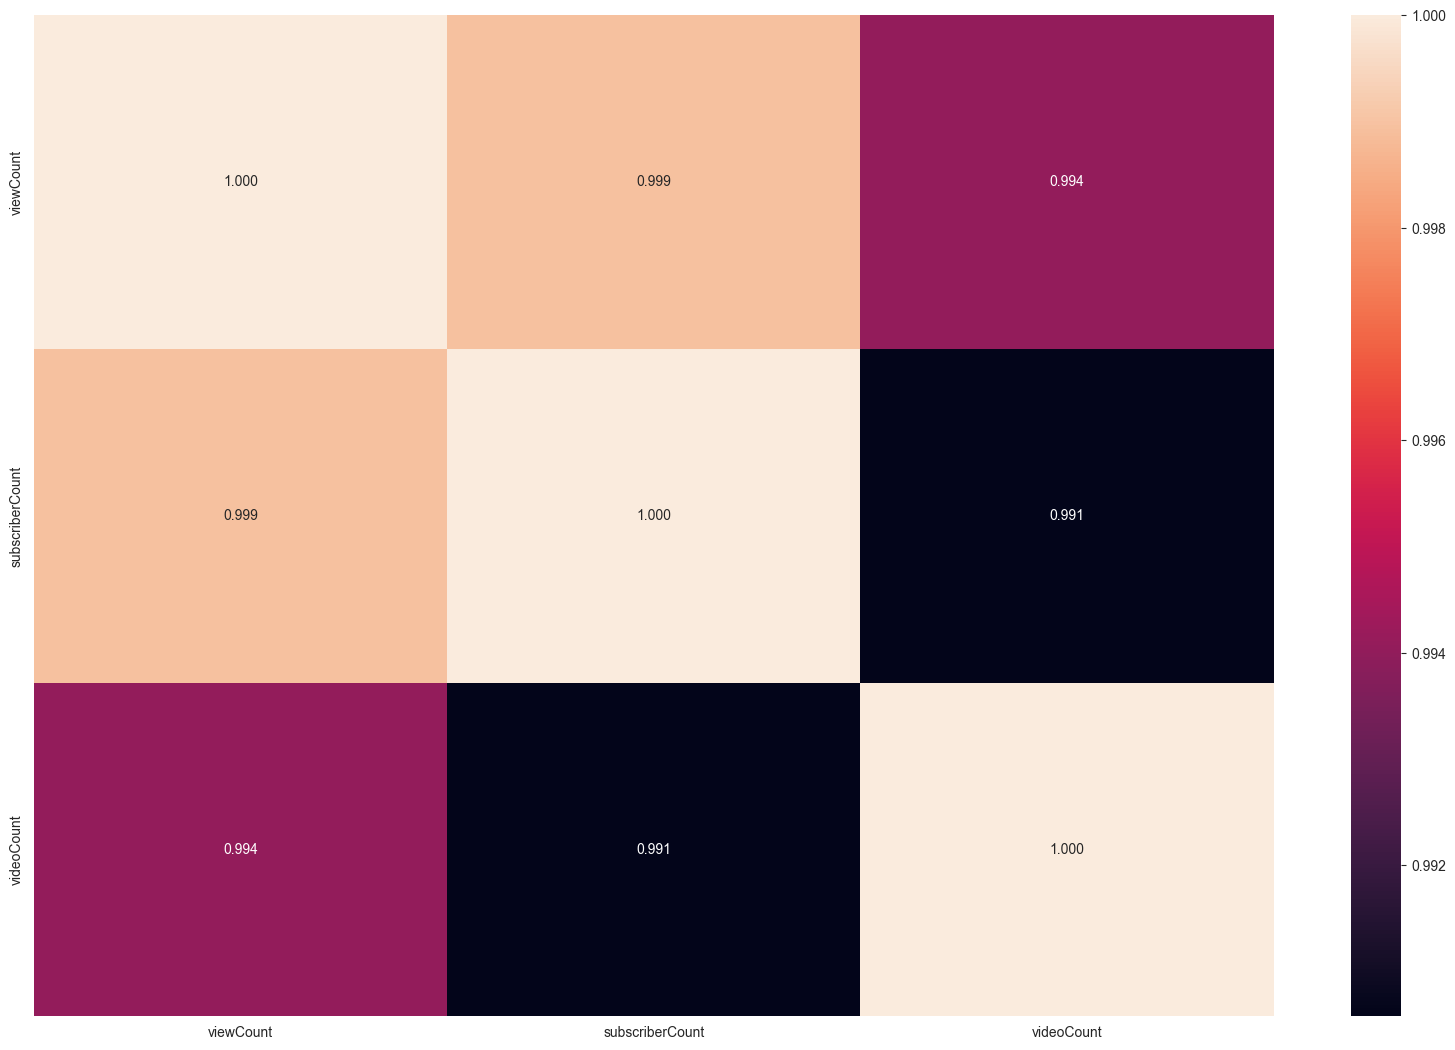

In [36]:
plt.figure(figsize=[20,13])
sns.heatmap(df.corr(numeric_only=True), annot=True,  vmax=1, fmt='.3f')

In [28]:
!pip install wordcloud
from wordcloud import WordCloud

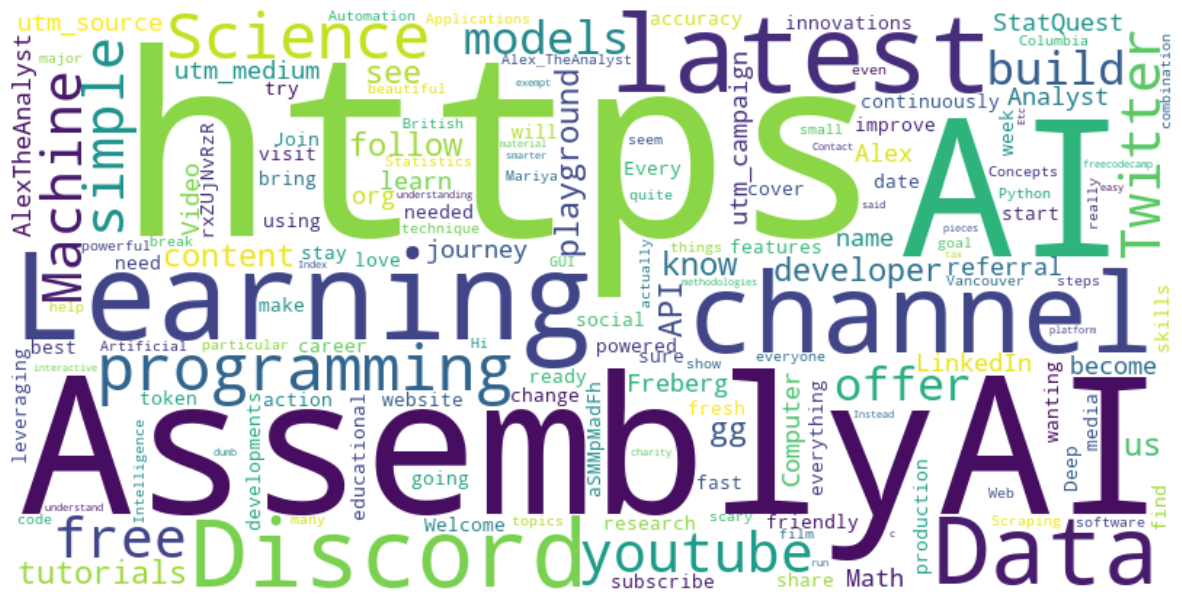

In [29]:
text = ' '.join(df['description'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(15, 8)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()